In [1]:
# Loading the config file:
import os
files = os.listdir('./templates/ycbv_desc/models_xyz/')
print(files)

['norm_factor.json', 'obj_000016.ply', 'obj_000002.ply', 'obj_000003.ply', 'obj_000017.ply', 'obj_000001.ply', 'obj_000015.ply', 'obj_000014.ply', 'obj_000004.ply', 'obj_000010.ply', 'obj_000011.ply', 'obj_000005.ply', 'obj_000013.ply', 'obj_000007.ply', 'obj_000006.ply', 'obj_000012.ply', 'obj_000008.ply', 'obj_000020.ply', 'obj_000021.ply', 'obj_000009.ply', 'obj_000019.ply', 'obj_000018.ply', 'models_factor.json']


In [4]:
from zs6d import ZS6D
import os
import json




with open(os.path.join("./zs6d_configs/bop_eval_configs/cfg_ycbv_inference_bop.json"), "r") as f:
    config = json.load(f)
    
# Instantiating the pose estimator:
# This involves handing over the path to the templates_gt file and the corresponding object norm_factors.
pose_estimator = ZS6D(config['templates_gt_path'], config['norm_factor_path'],model_type='dino_vits8', stride=4,subset_templates=8, max_crop_size=80)

Using cache found in /home/kilian/.cache/torch/hub/facebookresearch_dino_main
100%|██████████| 21/21 [00:28<00:00,  1.37s/it]


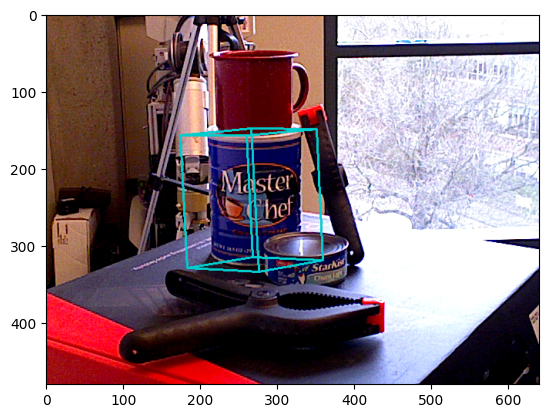

Pose estimation time: 12.64750599861145
R_est: [[ 0.64646105 -0.76132359 -0.04974433]
 [-0.05986751  0.01438014 -0.99810275]
 [ 0.7605945   0.64821262 -0.03628235]]
t_est: [-37.22750034  -1.78171814 874.67037814]


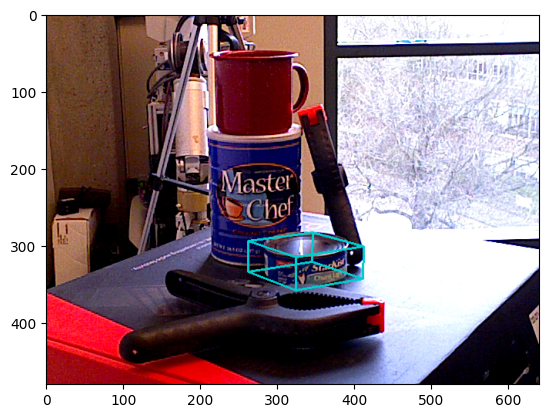

Pose estimation time: 11.008366584777832
R_est: [[ 0.58098848  0.81377114  0.01513027]
 [ 0.14125667 -0.08250729 -0.98652881]
 [-0.80156031  0.57529913 -0.16288639]]
t_est: [ 18.58380922  61.86880867 854.89344085]


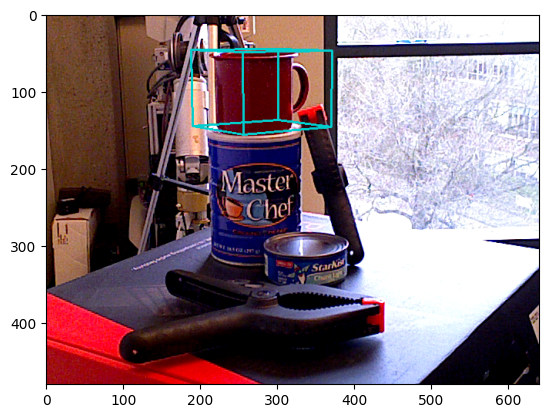

Pose estimation time: 13.681627035140991
R_est: [[ 0.77970826 -0.62613617  0.00291777]
 [-0.12348682 -0.15833942 -0.9796324 ]
 [ 0.61384528  0.76346717 -0.20077812]]
t_est: [ -26.87158913 -119.18873886  881.57179027]


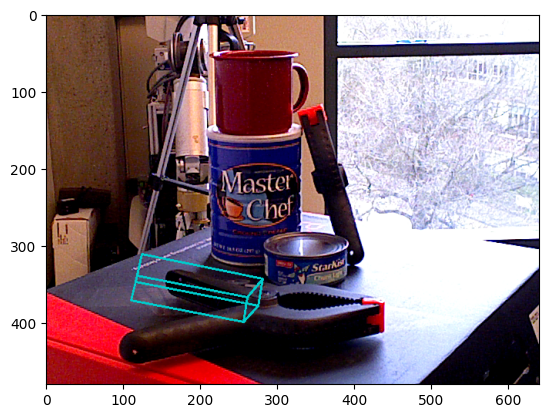

Pose estimation time: 10.244208335876465
R_est: [[ 0.22052503  0.96461274  0.14453709]
 [-0.32456119  0.21231097 -0.92172886]
 [-0.91979821  0.15635316  0.35989574]]
t_est: [-133.14916282  130.1562179  1189.56100817]


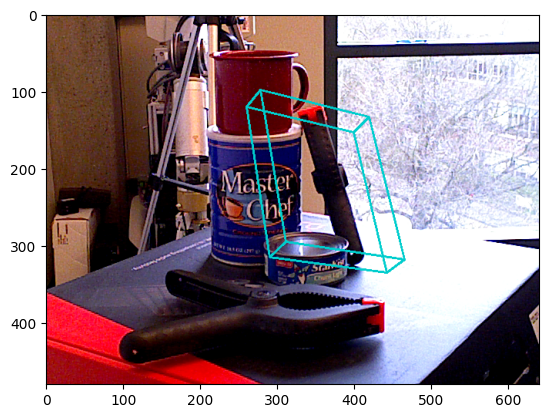

Pose estimation time: 11.40382719039917
R_est: [[ 0.14963619  0.85013538  0.50485528]
 [ 0.85115527  0.14907133 -0.50330154]
 [-0.50313389  0.50502236 -0.70129074]]
t_est: [ 44.15064846 -22.42936264 994.75475991]


In [3]:
import cv2
from PIL import Image
import pose_utils.img_utils as img_utils
import pose_utils.vis_utils as vis_utils
import numpy as np
import time
import matplotlib.pyplot as plt

# Loading a ground truth file to access segmentation masks to test zs6d:
with open(os.path.join(config['gt_path']), 'r') as f:
    data_gt = json.load(f)

img_id = '000048_1'
# img_id = '8'



for i in range(len(data_gt[img_id])):
    obj_number = i
    obj_id = data_gt[img_id][obj_number]['obj_id']
    cam_K = np.array(data_gt[img_id][obj_number]['cam_K']).reshape((3,3))
    bbox = data_gt[img_id][obj_number]['bbox_visib']

    img_path = os.path.join(config['dataset_path'], data_gt[img_id][obj_number]['img_name'].split("./")[-1])
    # own test
    img_path = os.path.join('test/', '000001.png')
    img = Image.open(img_path)

    mask = data_gt[img_id][obj_number]['mask_sam']
    mask = img_utils.rle_to_mask(mask)
    mask = mask.astype(np.uint8)

    start_time = time.time()
    
    # To estimate the objects Rotation R and translation t the input image, the object_id, a segmentation mask and camera matrix are necessary
    R_est, t_est = pose_estimator.get_pose(img, str(obj_id), mask, cam_K, bbox=None)

    end_time = time.time()
    
    out_img = vis_utils.draw_3D_bbox_on_image(np.array(img), R_est, t_est, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0)

    plt.imshow(out_img)
    plt.show()
    print(f"Pose estimation time: {end_time-start_time}")
    print(f"R_est: {R_est}")
    print(f"t_est: {t_est}")


